In [ ]:
%run preamble_2.py
%matplotlib inline

!mkdir -p images tables results

from IPython.display import HTML

In [ ]:
#
# Uniform Baseline
#
DS_NAME = "Uniform Distribution"

# 1000 batches a 100 samples
DS_DATA = [ np.random.uniform(10, 100, size=100) for i in range(1000) ]

DS_QUANTILES = np.linspace(0,1,11)

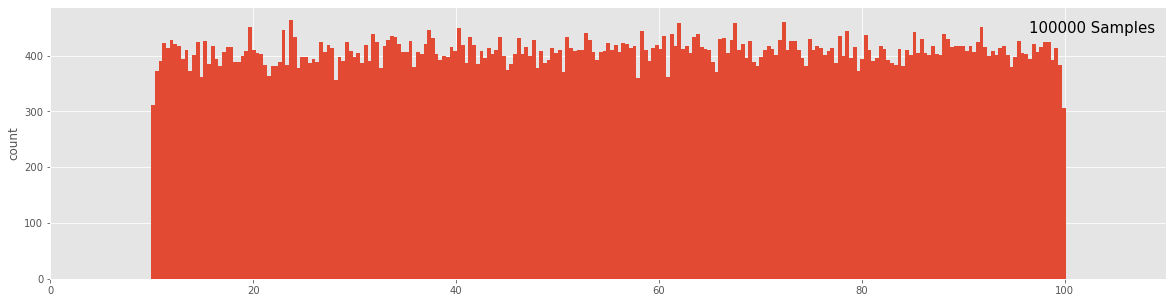

In [3]:
total = np.concatenate(DS_DATA)
ax = lin_plot(total, [])
plt.savefig("images/" + DS_NAME + "_distribution")

In [37]:
# Run Configuration

# HDR
CLASSES[2].M = 10**8

# Prom
CLASSES[6].thresholds = np.linspace(0,100,11)

METHODS_SEL = [
 'exact',
 'prom',
 'hdr',
 'tdigest',
 'dd',
 'circllhist/type-7',
]
METHODS_RENAME = { 'circllhist/type-7' : "circllhist" }

In [5]:
STATS = evaluate_all(DS_DATA, DS_QUANTILES)

# exact
Insert .........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [54]:
%run preamble_2.py
reevaluate(STATS, "hdr", DS_DATA, DS_QUANTILES)

# hdr
Insert ...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

<Figure size 432x288 with 0 Axes>

In [55]:
save(json.dumps(STATS), "results/" + DS_NAME + ".json")

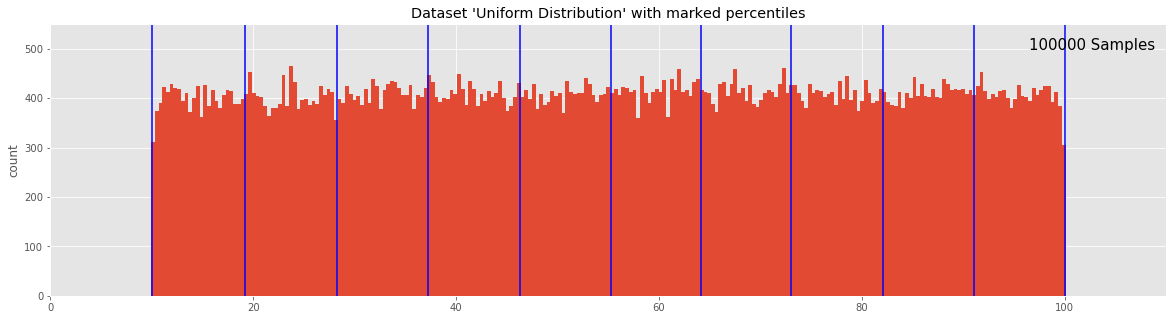

In [56]:
lin_plot(total, [STATS["exact"]["quantiles"][q] for q in DS_QUANTILES ])
plt.ylim(0,550)
plt.title("Dataset '{}' with marked percentiles".format(DS_NAME))
plt.savefig("images/" + DS_NAME + "_distribution_percentiles", bbox_inches="tight")

(0, 120)

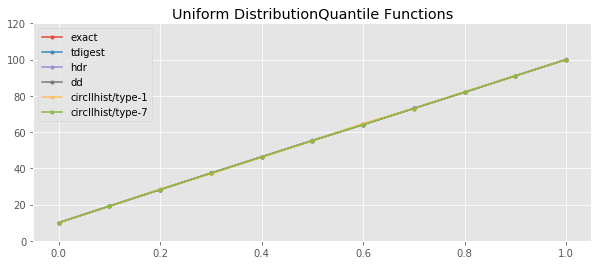

In [57]:
#
# Stats: Quantiles
#
df = stats_quantiles(STATS)[METHODS_SEL]

# save(df.to_latex(), "tables/" + DS_NAME + "_quantiles.tex")

plt.figure(figsize=(10,4))
plt.title(DS_NAME + "Quantile Functions")
for name in METHODS_SEL:
    plt.plot(DS_QUANTILES, [ STATS[name]["quantiles"][q] for q in DS_QUANTILES ] ,".-")

plt.legend(METHODS)
plt.ylim(0, 120)
# plt.savefig("images/" + DS_NAME + "_quantile_comparison")

In [58]:
df

,exact,prom,hdr,tdigest,dd,circllhist/type-7
q0,10.001426,10.000000,9.985799,10.001426,10.001426,10.000966
q.1,19.172407,19.107468,19.219979,19.147680,19.106877,19.141732
q.2,28.296334,28.291203,28.346784,28.292682,28.504491,28.276699
q.3,37.264394,37.266804,37.366215,37.251144,36.968653,37.273345
q.4,46.248122,46.282144,46.385647,46.246683,46.066116,46.270463
q.5,55.270736,55.270500,55.405078,55.293095,55.151485,55.274802
q.6,64.124528,64.184580,64.424509,64.120569,64.721212,64.133929
q.7,73.009708,73.086343,73.014444,73.019040,72.973255,73.009778
q.8,82.025324,82.028298,82.033875,82.024103,82.277445,82.032698
q.9,91.004775,90.989367,91.053307,90.998935,90.930942,91.005055


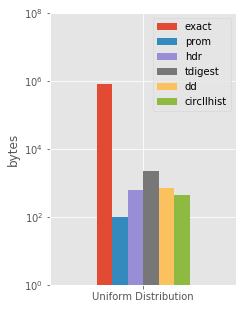

In [59]:
#
# Stats: Size
#
df = stats_size(STATS)[METHODS_SEL].rename({"bsize" : DS_NAME }).rename({ "circllhist/type-7" : "circllhist" }, axis=1)

save(df.to_latex(), "tables/" + DS_NAME + "_size.tex")

fig = plt.figure(figsize=(10/3,5))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
# plt.title(DS_NAME + " / Size Comparison")
plt.title("")
plt.yscale("log")
plt.ylabel("bytes")
plt.xticks(rotation=0)
plt.ylim(1, 10**8)
plt.savefig("images/" + DS_NAME + "_size", bbox_inches = "tight")

In [60]:
df

,exact,prom,hdr,tdigest,dd,circllhist
Uniform Distribution,800000,96,621.0,2224,716,453.0


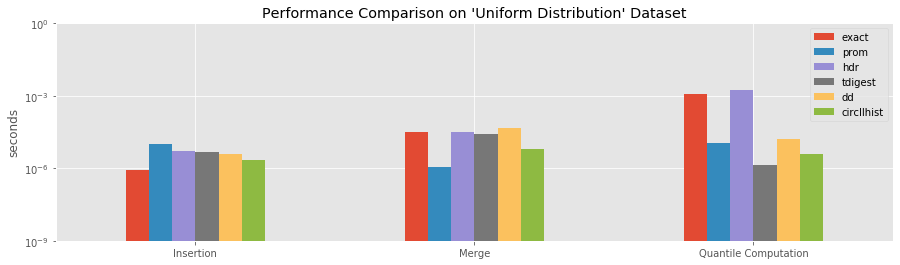

In [61]:
#
# Stast: Timing
#
df = stats_timing(STATS)[METHODS_SEL].rename({ "circllhist/type-7" : "circllhist" }, axis=1)

df.rename({ "insert" : "Insertion" , "merge" : "Merge", "quantiles" : "Quantile Computation" },inplace=True)

# table in usec
(df*10**6).to_latex("tables/" + DS_NAME + "_perf.tex", float_format = "%.1f")

fig = plt.figure(figsize=(15, 4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.yscale("log")
plt.ylim(1e-9, 1e0)
plt.yticks([10**-9, 10**-6, 10**-3, 10**-0])
plt.ylabel("seconds")
plt.title("Performance Comparison on '{}' Dataset".format(DS_NAME))
plt.xticks(rotation=0)
plt.savefig("images/" + DS_NAME + "_perf", bbox_inches = "tight")

In [62]:
df

,exact,prom,hdr,tdigest,dd,circllhist
Insertion,8.537436e-07,0.000010,0.000005,0.000005,0.000004,0.000002
Merge,3.310061e-05,0.000001,0.000033,0.000027,0.000046,0.000006
Quantile Computation,1.180344e-03,0.000011,0.001706,0.000001,0.000017,0.000004


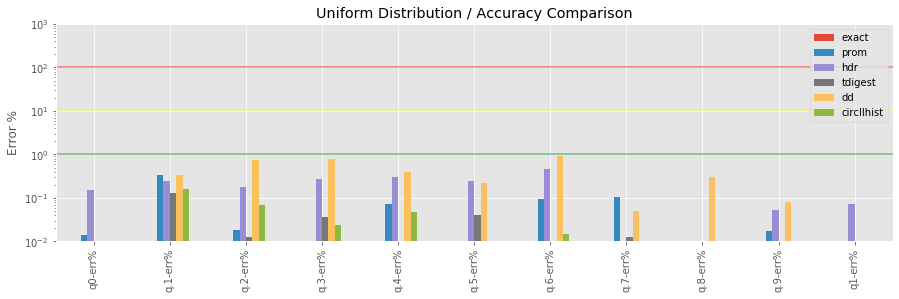

In [63]:
#
# Stats: Accuracy
#
df = stats_qerr(STATS)[METHODS_SEL].rename({ "circllhist/type-7" : "circllhist" }, axis=1)

METHODS_TBL = list(df.columns)
METHODS_TBL.remove("exact")
df[METHODS_TBL].to_latex("tables/" + DS_NAME + "_accuracy.tex", float_format="%.3f")

fig = plt.figure(figsize=(15, 4))
ax = plt.subplot(1,1,1)
plt.title(DS_NAME + " / Accuracy Comparison")
ax.axhline(1, alpha=0.5, color="green")
ax.axhline(10, alpha=0.5, color="yellow")
ax.axhline(100, alpha=0.5, color="red")
df.plot(kind="bar", ax=ax)
plt.legend(loc="upper right")
plt.yscale("log")
plt.ylabel("Error %")
plt.ylim(1e-2, 1e3)
plt.savefig("images/" + DS_NAME + "_accuracy", bbox_inches="tight")